In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from  google.colab import files
import io
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb
%matplotlib inline

In [2]:
data=files.upload()

Saving indian_liver_patient.csv to indian_liver_patient.csv


In [3]:
data=pd.read_csv('/content/indian_liver_patient.csv')


In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
data.Albumin_and_Globulin_Ratio.fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:

data.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Gender']= lc.fit_transform(data['Gender'])

In [13]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


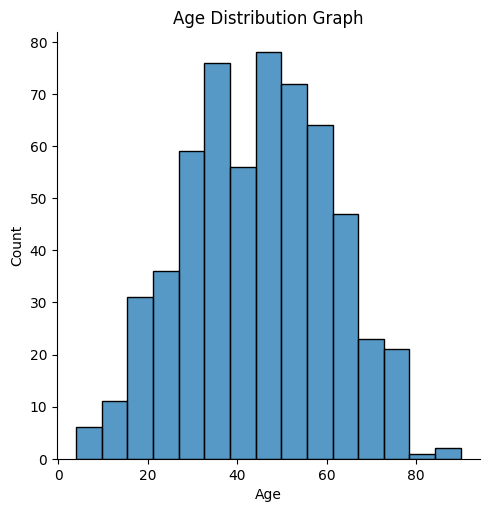

In [14]:
sns.displot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()


<Axes: xlabel='Albumin', ylabel='count'>

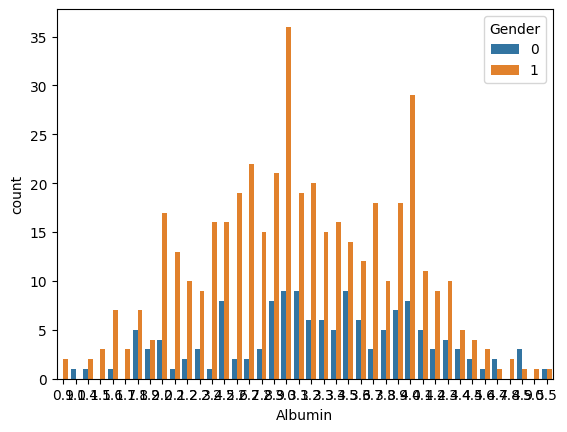

In [15]:
sns.countplot(x=data['Albumin'], hue=data['Gender'])

<Axes: >

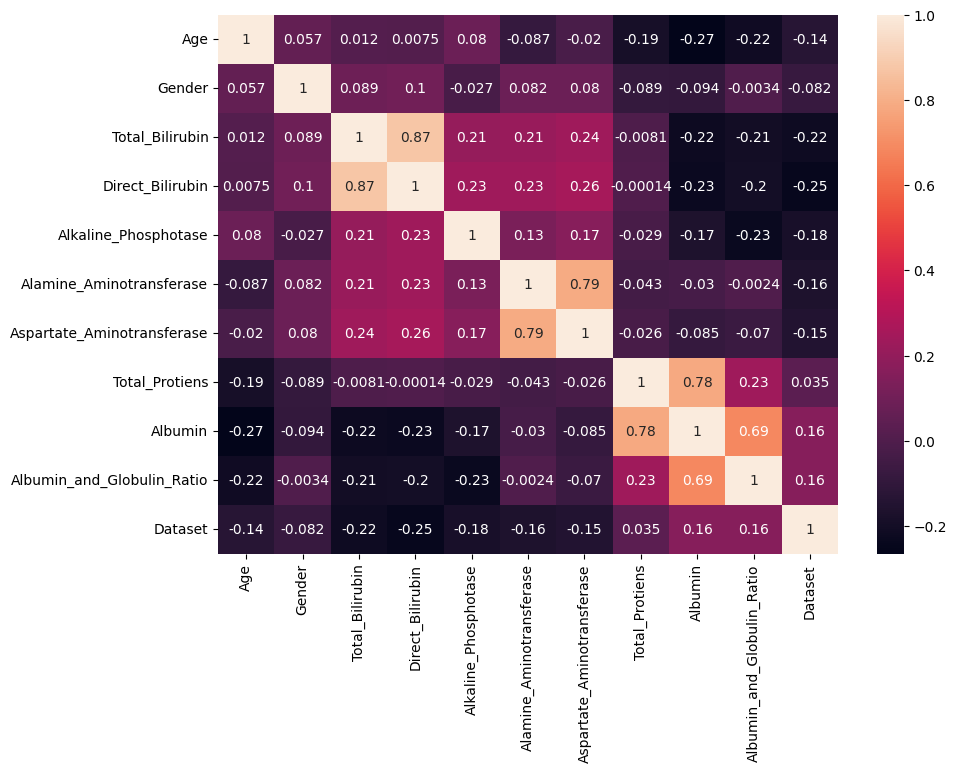

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [17]:

from sklearn.preprocessing import scale
x=data.iloc[:,:-1]
y=data['Dataset']
x_scaled=pd.DataFrame(scale(x), columns=x.columns)
x_scaled.head()                    

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier


In [25]:
x_train_smote, y_train_smote=smote.fit_resample(x_train,y_train)
y_train_smote.value_counts()

1    329
2    329
Name: Dataset, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train_smote, y_train_smote)
y_predict=model1.predict(x_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.82      0.79      0.81        87
           2       0.45      0.50      0.48        30

    accuracy                           0.72       117
   macro avg       0.64      0.65      0.64       117
weighted avg       0.73      0.72      0.72       117



In [27]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(x_train_smote,y_train_smote)
y_predict=model4.predict(x_test)
dtc1=accuracy_score(y_test,y_predict)
dtc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.79      0.76      0.77        87
           2       0.36      0.40      0.38        30

    accuracy                           0.67       117
   macro avg       0.57      0.58      0.58       117
weighted avg       0.68      0.67      0.67       117



In [28]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train_smote,y_train_smote)
y_predict=model2.predict(x_test)
knn1=(accuracy_score(y_test,y_predict))
knn1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.88      0.64      0.74        87
           2       0.42      0.73      0.53        30

    accuracy                           0.67       117
   macro avg       0.65      0.69      0.64       117
weighted avg       0.76      0.67      0.69       117



In [29]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(x_train_smote,y_train_smote)
y_predict=model5.predict(x_test)
logi1=accuracy_score(y_test,y_predict)
logi1
pd.crosstab(y_test,y_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.96      0.63      0.76        87
           2       0.47      0.93      0.62        30

    accuracy                           0.71       117
   macro avg       0.72      0.78      0.69       117
weighted avg       0.84      0.71      0.73       117



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(units=100,activation='relu',input_dim=10))
classifier.add(Dense(units=50,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 62ms/step - loss: 12.9178 - accuracy: 0.2930 - val_loss: -3.0791 - val_accuracy: 0.6915
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: -6.0669 - accuracy: 0.6801 - val_loss: -8.8124 - val_accuracy: 0.7234
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: -12.0002 - accuracy: 0.7016 - val_loss: -13.6127 - val_accuracy: 0.7234
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: -17.8040 - accuracy: 0.7016 - val_loss: -18.7767 - val_accuracy: 0.7234
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: -23.6735 - accuracy: 0.7016 - val_loss: -24.5461 - val_accuracy: 0.7234
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: -30.5195 - accuracy: 0.7016 - val_loss: -30.7501 - val_accuracy: 0.7234
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: -37.8649 - accuracy: 0.7016 - val_loss: -37.5493 - val_accuracy: 0.72

In [33]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [35]:
classifier.save("liver.h5")
y_pred = classifier.predict(x_test)


4/4 [==============================] - 0s 2ms/step


In [36]:
y_pred
y_pred = (y_pred > 0.5)
y_pred


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [37]:
def predict_exit(sample_value):
  # Convert list to numpy array
  sample_value = np.array(sample_value)
  #Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)
  #Feature Scaling
  sample_value = scale(sample_value)
  return classifier.predict(sample_value)

In [38]:
#Age-->|Gender-->|Total_Bilrubin-->|Direct_Bilrubin->|Alkaline_phosphotase-->|
sample_value = [[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
  print('prediction: Liver Patient')
else:
    print('prediction: Healthy ')

1/1 [==============================] - 0s 49ms/step
prediction: Liver Patient


In [39]:
acc_smote= [['KNN Classifier', knn1],  ['RandomForestClassifier', rfc1],
            ['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_smote, columns= ['classification models','accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.666667
1,RandomForestClassifier,0.717949
2,DecisionTreeClassifier,0.666667
3,LogisticRegression,0.709402


<Axes: title={'center': 'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

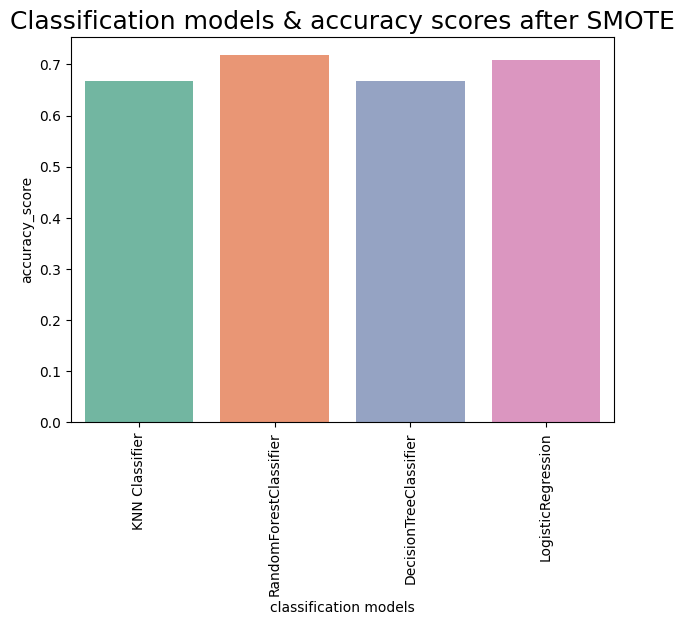

In [40]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models",y="accuracy_score", data=Liverpatient_pred,palette ="Set2")


In [41]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [42]:
model.feature_importances_

array([0.11804372, 0.02530416, 0.11100458, 0.10949325, 0.11520782,
       0.11264031, 0.11515237, 0.09528722, 0.10112368, 0.09674289])

In [43]:

dd=pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(0,ascending=False)
dd

,0
Age,0.118044
Alkaline_Phosphotase,0.115208
Aspartate_Aminotransferase,0.115152
Alamine_Aminotransferase,0.112640
Total_Bilirubin,0.111005
Direct_Bilirubin,0.109493
Albumin,0.101124
Albumin_and_Globulin_Ratio,0.096743
Total_Protiens,0.095287
Gender,0.025304


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

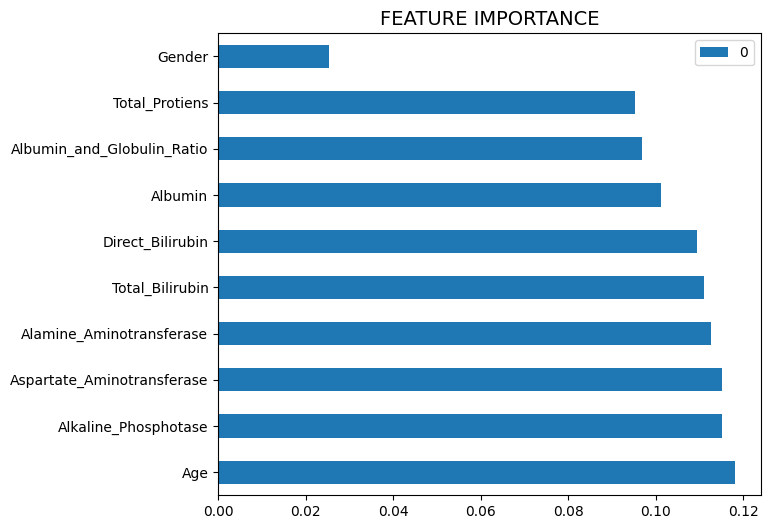

In [44]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [45]:
import joblib
joblib.dump(model1, 'ETC.pkl')

['ETC.pkl']